In [1]:
import pandas
data = pandas.read_csv('MEU-Mobile.csv')

import numpy as np

In [2]:
cols_Hold = ['Hold .', 'Hold t', 'Hold i', 'Hold e', 'Hold Shift', 'Hold 5', 'Hold Shift.1', 'Hold Caps', 'Hold r', 'Hold o', 'Hold a', 'Hold n', 'Hold l', 'Hold Enter']
data['Std H'] = np.std(data[cols_Hold], axis=1)
cols_Pressure = ['Pressure .', 'Pressure t', 'Pressure i', 'Pressure e', 'Pressure Shift', 'Pressure 5', 'Pressure Shift.1', 'Pressure Caps', 'Pressure r', 'Pressure o', 'Pressure a', 'Pressure n', 'Pressure l', 'Pressure Enter']
data['Std P'] = np.std(data[cols_Pressure], axis=1)
cols_Area = ['Size .', 'Size t', 'Size i', 'Size e', 'Size Shift', 'Size 5', 'Size Shift.1', 'Size Caps', 'Size r', 'Size o', 'Size a', 'Size n', 'Size l', 'Size Enter']
data['Std A'] = np.std(data[cols_Area], axis=1)

## Feature selection
# PCA

In [3]:
import matplotlib.pyplot as plt
% matplotlib inline

In [55]:
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.preprocessing import StandardScaler
pca = PCA(n_components=74)

X = data.drop('Subject', axis=1, inplace=False)
X = X.values
Y = data['Subject']
Y = Y.values

scaler = StandardScaler()
X_norm = scaler.fit_transform(X)
X_reduced = pca.fit_transform(X_norm)

print(pca.singular_values_)

[2.08424017e+02 1.44597565e+02 1.22390496e+02 8.33480790e+01
 7.92370538e+01 7.64939242e+01 7.56585318e+01 7.37218978e+01
 7.27193738e+01 7.15230088e+01 6.96292892e+01 6.84713429e+01
 6.62681436e+01 6.42593155e+01 6.20279782e+01 6.06376256e+01
 5.91084134e+01 5.62677394e+01 5.45142096e+01 5.39358761e+01
 5.32442105e+01 5.18835754e+01 4.88124342e+01 4.80117917e+01
 4.76674078e+01 4.73240580e+01 4.61779796e+01 4.52575211e+01
 4.49000317e+01 4.45182318e+01 4.39422276e+01 4.04679565e+01
 3.91852329e+01 3.88389356e+01 3.72124739e+01 3.67703533e+01
 3.61142556e+01 3.54662719e+01 3.48835081e+01 3.42165154e+01
 3.39624458e+01 3.36610292e+01 3.34718076e+01 3.33299416e+01
 3.23479751e+01 3.20450206e+01 3.14724054e+01 3.06638644e+01
 3.03844713e+01 3.01886305e+01 3.00097654e+01 2.90698663e+01
 2.83707234e+01 2.80236908e+01 2.73616686e+01 2.70735338e+01
 2.51656431e+01 1.55694787e+01 4.50222151e-13 2.30156914e-13
 1.39527411e-13 4.33486816e-14 3.50271771e-14 3.34818522e-14
 3.19460781e-14 1.840388

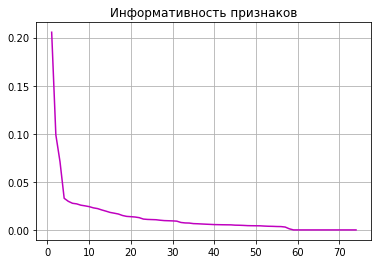

[]


In [59]:
x = range(1, 75)
plt.title('Информативность признаков')
plt.plot(x, pca.explained_variance_ratio_, color='m')
#plt.legend()
plt.grid()
plt.show()
print(plot_out[:-17])
#17 last are no info   #TODO grid

Projecting 74-dimensional data to 2D


Text(0.5,1,'Проекция данных о разных пользователях на плоскость')

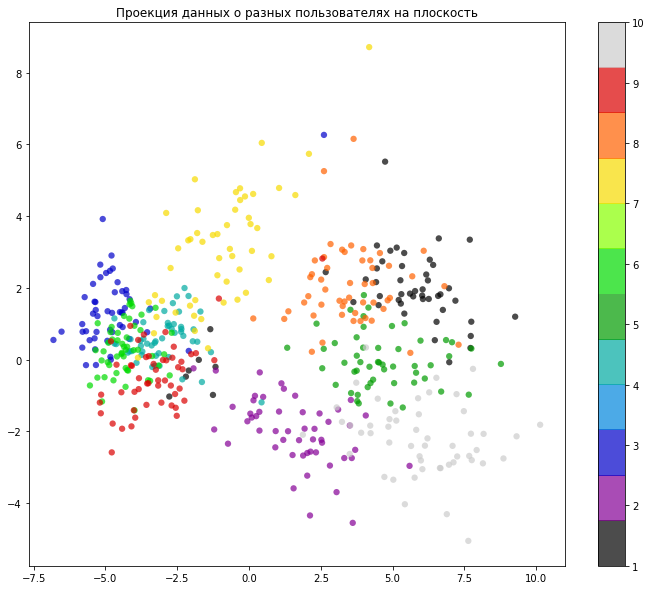

In [9]:
print('Projecting %d-dimensional data to 2D' % X.shape[1])

plt.figure(figsize=(12,10))
plt.scatter(X_reduced[:51 * 10, 0], X_reduced[:51 * 10, 1], c=Y[:51 * 10], 
            edgecolor='none', alpha=0.7, s=40,
            cmap=plt.cm.get_cmap('nipy_spectral', 12))
plt.colorbar()
plt.title('Проекция данных о разных пользователях на плоскость')

Text(0.5,1,'MNIST. t-SNE projection')

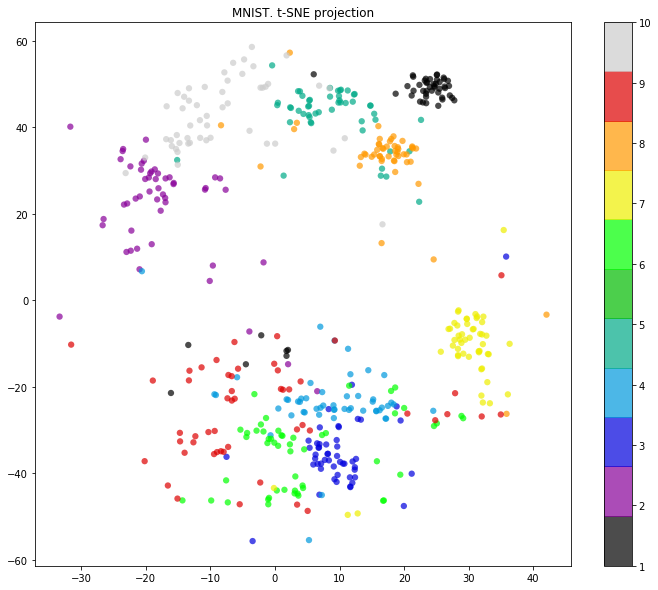

In [6]:
from sklearn.manifold import TSNE
tsne = TSNE(random_state=17)

X_tsne = tsne.fit_transform(X_reduced)

plt.figure(figsize=(12,10))
plt.scatter(X_tsne[:510, 0], X_tsne[:510, 1], c=Y[:510], 
            edgecolor='none', alpha=0.7, s=40,
            cmap=plt.cm.get_cmap('nipy_spectral', 11))
plt.colorbar()
plt.title('MNIST. t-SNE projection')

# Template
## Distance-based

In [4]:
from scipy.spatial.distance import cdist
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold

X = data.drop('Subject', axis=1, inplace=False)
X = X.values

metrics = ['euclidean', 'cityblock']
num_users = 56
good_train_size = 40
num_shuf = 5
plot_out = []
plot_test = []
x = range(92, 100, 1)
#x = [90, 97, 98, 99]
for metr in metrics:
    print("____________________", metr, "________________________")
    for thres in x:
        print("-----")
        print(thres)
        thres_array = []
        errors_out = []                
        errors_test = []
        for user in range(num_users):
            X_good = X[user * 51:(user + 1) * 51]
            for shuf in range(num_shuf):
                scaler = StandardScaler()
                np.random.shuffle(X_good)

                X_train = scaler.fit_transform(X_good[:good_train_size])
                X_test = scaler.transform(X_good[good_train_size:])
                X_out = scaler.transform(np.concatenate((X[:user * 51], X[(user + 1) * 51:]), axis=0))

                np.random.shuffle(X_out)

                template = np.mean(X_train, axis=0).reshape((1,-1))
                dist_train = []
                for i in range(X_train.shape[0]):
                    dist_train.append(cdist(template, X_train[i, :].reshape((1, -1)), metr))
                dist_test = []
                for i in range(X_test.shape[0]):
                    dist_test.append(cdist(template, X_test[i, :].reshape((1, -1)), metr))

                dist_out = []
                for i in range(X_out.shape[0]):
                    dist_out.append(cdist(template, X_out[i, :].reshape((1, -1)), metr))

                threshold = np.percentile(dist_train, thres)
                thres_array.append(threshold)
                #threshold = thres

                err_test = 0
                for dist in dist_test:
                    if dist > threshold:
                        err_test += 1
                errors_test.append(err_test)

                err_out = 0
                for dist in dist_out:
                    if dist <= threshold:
                        err_out += 1
                errors_out.append(err_out)

        print("OUT-mean", np.mean(errors_out) / X_out.shape[0])
        plot_out.append(np.mean(errors_out) / X_out.shape[0] * 100)
        print("OUT-std", np.std(errors_out) / X_out.shape[0])

        print("TEST-mean", np.mean(errors_test) / X_test.shape[0])
        plot_test.append(np.mean(errors_test) / X_test.shape[0] * 100)
        print("TEST-std", np.std(errors_test) / X_test.shape[0])

        print("threshold", np.mean(thres_array))
#print(plot_out)

plt.title('Сравнение результатов с использованием различных метрик')
plt.plot(x, plot_out[:len(x)], color='m', label='Евклидова - FAR')
plt.plot(x, plot_out[len(x):2 * len(x)], color='green', label='Манхэттенская - FAR')
plt.plot(x, plot_test[:len(x)], 'm--', label='Евклидова - FRR')
plt.plot(x, plot_test[len(x):2 * len(x)], 'g--', label='Манхэттенская - FRR')
plt.xlabel('Перцентиль')
plt.ylabel('Процент ошибок')
plt.grid()
plt.legend()
plt.show()

____________________ mahalanobis ________________________
-----
92


ValueError: The number of observations (2) is too small; the covariance matrix is singular. For observations with 74 dimensions, at least 75 observations are required.

ValueError: x and y must have same first dimension, but have shapes (5,) and (1,)

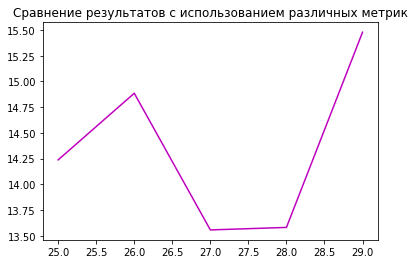

In [67]:
plot_out = [x * 100 for x in plot_out]
plot_test = [x * 100 for x in plot_test]

plt.title('Сравнение результатов с использованием различных метрик')
plt.plot(x, plot_out[:len(x)], color='m', label='Евклидова - FAR')
plt.plot(x, plot_out[len(x):2 * len(x)], color='green', label='Манхэттенская - FAR')
plt.plot(x, plot_test[:len(x)], 'm--', label='Евклидова - FRR')
plt.plot(x, plot_test[len(x):2 * len(x)], 'g--', label='Манхэттенская - FRR')
plt.legend()
plt.xlabel('Перцентиль')
plt.ylabel('Процент ошибок')
plt.grid()
plt.show()

## Размер обучающей выборки

------
10
OUT-mean 0.0419633307869
OUT-std 0.0540652864454
TEST-mean 0.248780487805
TEST-std 0.16321689633
------
11
OUT-mean 0.0439508530685
OUT-std 0.058999038703
TEST-mean 0.233125
TEST-std 0.143656219409
------
12
OUT-mean 0.0432238349885
OUT-std 0.0602654318921
TEST-mean 0.228937728938
TEST-std 0.146790044457
------
13
OUT-mean 0.0399121466769
OUT-std 0.0461858141889
TEST-mean 0.218515037594
TEST-std 0.140304628832
------
14
OUT-mean 0.0467914438503
OUT-std 0.063082706114
TEST-mean 0.201158301158
TEST-std 0.12359072756
------
15
OUT-mean 0.0412732365674
OUT-std 0.0519079317504
TEST-mean 0.204464285714
TEST-std 0.125204504858
------
16
OUT-mean 0.0428214922333
OUT-std 0.0536071996602
TEST-mean 0.196224489796
TEST-std 0.124541265707
------
17
OUT-mean 0.0443277310924
OUT-std 0.0523869804874
TEST-mean 0.187920168067
TEST-std 0.119141867249
------
18
OUT-mean 0.0458734402852
OUT-std 0.0544116147537
TEST-mean 0.192965367965
TEST-std 0.12281289721
------
19
OUT-mean 0.0427578304049
OUT-

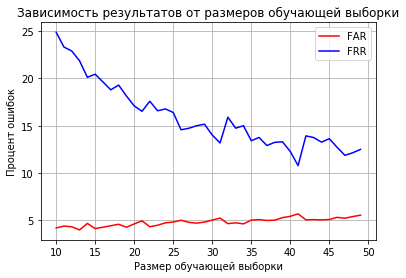

In [54]:
from sklearn.preprocessing import StandardScaler

X = data.drop('Subject', axis=1, inplace=False)
X = X.values

#good_train_size = 35
num_users = 56
num_shuf = 5
plot_out = []
plot_test = []
l = 0.9

x = range(10, 50, 1)
for good_train_size in x:
    thres_array = []
    errors_out = []
    errors_test = []
    for k in range(1):
        print("------")
        print(good_train_size)
        for user in range(num_users):
            for shuf in range(num_shuf):
                X_good = X[user * 51:(user + 1) * 51]
                scaler = StandardScaler()
                np.random.shuffle(X_good)

                X_train = scaler.fit_transform(X_good[:good_train_size])
                X_test = scaler.transform(X_good[good_train_size:])
                X_out = scaler.transform(np.concatenate((X[:user * 51], X[(user + 1) * 51:]), axis=0))

                np.random.shuffle(X_out)

                vals_train = []
                for i in range(X_train.shape[0]):
                    current = X_train[i, :]
                    n_err = current[current < -l].size + current[current > l].size
                    vals_train.append(n_err)

                vals_test = []
                for i in range(X_test.shape[0]):
                    current = X_test[i, :]
                    n_err = current[current < -l].size + current[current > l].size
                    vals_test.append(n_err)

                vals_out = []
                for i in range(X_out.shape[0]):
                    current = X_out[i, :]
                    n_err = current[current < -l].size + current[current > l].size
                    vals_out.append(n_err)

                threshold = np.percentile(vals_train, 90)
                #thres_array.append(threshold)
                #threshold = thres                                       

                err_test = 0
                for val in vals_test:
                    if val > threshold:
                        err_test += 1
                errors_test.append(err_test)

                err_out = 0
                for val in vals_out:
                    if val <= threshold:
                        err_out += 1
                errors_out.append(err_out)


        print("OUT-mean", np.mean(errors_out) / X_out.shape[0])
        plot_out.append(np.mean(errors_out) / X_out.shape[0] * 100)
        print("OUT-std", np.std(errors_out) / X_out.shape[0])
        
        print("TEST-mean", np.mean(errors_test) / X_test.shape[0])
        plot_test.append(np.mean(errors_test) / X_test.shape[0] * 100)
        print("TEST-std", np.std(errors_test) / X_test.shape[0])
        
        #print("threshold", np.mean(thres_array))
        
        
plt.title('Зависимость результатов от размеров обучающей выборки')
plt.plot(x, plot_out, color='red', label='FAR')
plt.plot(x, plot_test, color='blue', label='FRR')
plt.xlabel('Размер обучающей выборки')
plt.ylabel('Процент ошибок')
plt.grid()
plt.legend()
plt.show()

## Interval

------
25
OUT-mean 0.0386618283677
OUT-std 0.0566815818634
TEST-mean 0.207792207792
TEST-std 0.176809489415
------
26
OUT-mean 0.0484199134199
OUT-std 0.0634138311806
TEST-mean 0.176623376623
TEST-std 0.161629624774
------
27
OUT-mean 0.0597478991597
OUT-std 0.0706330466682
TEST-mean 0.141233766234
TEST-std 0.128012279491
------
28
OUT-mean 0.0731130634072
OUT-std 0.0775843593763
TEST-mean 0.116233766234
TEST-std 0.121515352003
------
29
OUT-mean 0.0895021645022
OUT-std 0.0883129613096
TEST-mean 0.0720779220779
TEST-std 0.0937834103057


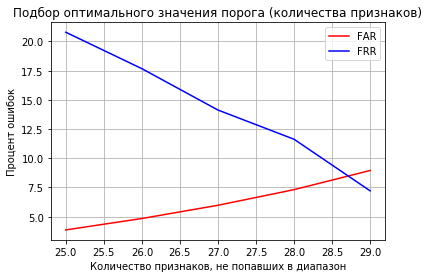

In [58]:
from sklearn.preprocessing import StandardScaler

X = data.drop('Subject', axis=1, inplace=False)
X = X.values

good_train_size = 40
num_users = 56
num_shuf = 5
plot_out = []
plot_test = []
l = 0.9

x = range(25, 30, 1)
#x = [85, 89, 93, 95]
for thres in x:
    thres_array = []
    errors_out = []
    errors_test = []
    for k in range(1):
        print("------")
        print(thres)
        for user in range(num_users):
            for shuf in range(num_shuf):
                X_good = X[user * 51:(user + 1) * 51]
                scaler = StandardScaler()
                np.random.shuffle(X_good)

                X_train = scaler.fit_transform(X_good[:good_train_size])
                X_test = scaler.transform(X_good[good_train_size:])
                X_out = scaler.transform(np.concatenate((X[:user * 51], X[(user + 1) * 51:]), axis=0))

                np.random.shuffle(X_out)

                vals_train = []
                for i in range(X_train.shape[0]):
                    current = X_train[i, :]
                    n_err = current[current < -l].size + current[current > l].size
                    vals_train.append(n_err)

                vals_test = []
                for i in range(X_test.shape[0]):
                    current = X_test[i, :]
                    n_err = current[current < -l].size + current[current > l].size
                    vals_test.append(n_err)

                vals_out = []
                for i in range(X_out.shape[0]):
                    current = X_out[i, :]
                    n_err = current[current < -l].size + current[current > l].size
                    vals_out.append(n_err)

                #threshold = np.percentile(vals_train, thres)
                #thres_array.append(threshold)
                threshold = thres                                         #TODO

                err_test = 0
                for val in vals_test:
                    if val > threshold:
                        err_test += 1
                errors_test.append(err_test)

                err_out = 0
                for val in vals_out:
                    if val <= threshold:
                        err_out += 1
                errors_out.append(err_out)


        print("OUT-mean", np.mean(errors_out) / X_out.shape[0])
        plot_out.append(np.mean(errors_out) / X_out.shape[0] * 100)
        print("OUT-std", np.std(errors_out) / X_out.shape[0])
        
        print("TEST-mean", np.mean(errors_test) / X_test.shape[0])
        plot_test.append(np.mean(errors_test) / X_test.shape[0] * 100)
        print("TEST-std", np.std(errors_test) / X_test.shape[0])
        
        #print("threshold", np.mean(thres_array))
        
        
plt.title('Подбор оптимального значения порога (количества признаков)')
plt.plot(x, plot_out, color='red', label='FAR')
plt.plot(x, plot_test, color='blue', label='FRR')
plt.legend()
plt.xlabel('Количество признаков, не попавших в диапазон')
plt.ylabel('Процент ошибок')
plt.grid()
plt.show()

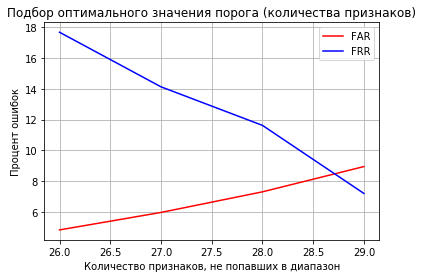

In [61]:
plt.title('Подбор оптимального значения порога (количества признаков)')
plt.plot(x[1:], plot_out[1:], color='red', label='FAR')
plt.plot(x[1:], plot_test[1:], color='blue', label='FRR')
plt.legend()
plt.xlabel('Количество признаков, не попавших в диапазон')
plt.ylabel('Процент ошибок')
plt.grid()
plt.show()

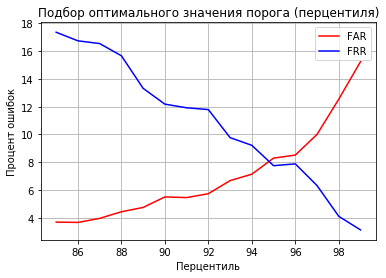

In [53]:
plt.title('Подбор оптимального значения порога (перцентиля)')
plt.plot(x[20:], plot_out[20:], color='red', label='FAR')
plt.plot(x[20:], plot_test[20:], color='blue', label='FRR')
plt.legend()
plt.xlabel('Перцентиль')
plt.ylabel('Процент ошибок')
plt.grid()
plt.show()

# Isolation Forest

5
OUT-mean 0.195277565572
OUT-std 0.167530419963
TEST-mean 0.0633116883117
TEST-std 0.0822493022136
6
OUT-mean 0.172882607588
OUT-std 0.147182460459
TEST-mean 0.0824675324675
TEST-std 0.0965132559188
7
OUT-mean 0.16042653425
OUT-std 0.14441486297
TEST-mean 0.087012987013
TEST-std 0.0924361540222
8
OUT-mean 0.147238349885
OUT-std 0.140968086344
TEST-mean 0.0970779220779
TEST-std 0.109159977363
9
OUT-mean 0.137187420423
OUT-std 0.129424508664
TEST-mean 0.112012987013
TEST-std 0.108645018713
10
OUT-mean 0.117447160682
OUT-std 0.114866135827
TEST-mean 0.124350649351
TEST-std 0.111752001623
11
OUT-mean 0.111144639674
OUT-std 0.111034857954
TEST-mean 0.141558441558
TEST-std 0.113061626356
12
OUT-mean 0.0991698497581
OUT-std 0.0916353494685
TEST-mean 0.158766233766
TEST-std 0.121360405202
13
OUT-mean 0.0964107461166
OUT-std 0.0942772708406
TEST-mean 0.146428571429
TEST-std 0.126314558481
14
OUT-mean 0.0824993633817
OUT-std 0.0847504418645
TEST-mean 0.16461038961
TEST-std 0.131399677924
15
OUT

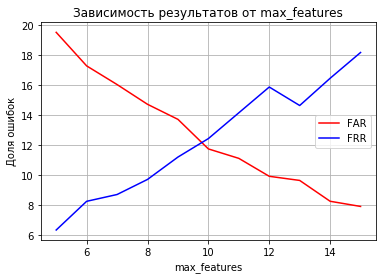

In [36]:
from sklearn.ensemble import IsolationForest

X = data.drop('Subject', axis=1, inplace=False)
X = X.values
#X = X_reduced

num_users = 56              #TODO
train_size = 40
num_shuf = 5
max_samp = np.arange(0.4, 1.05, 0.05) 
#x = np.arange(0.4, 1.05, 0.05)
#x = [0.4, 0.45, 0.5, 0.55, 0.65, 0.7, 0.75, 0.85, 0.95, 1.0]
plot_out = []
plot_test = []
#x = range(10, 200, 10)
x = range(5, 16, 1)

for thres in x:
    for j in [1]:
        print(thres)
        errors_test = []
        errors_out = []
        
        for user in range(num_users):         
            X_good = X[user * 51:(user + 1) * 51]
            X_out = np.concatenate((X[:user * 51], X[(user + 1) * 51:]), axis=0)

            #print("max_samp =", (j + 3) * 0.1)   
            for i in range(1):
                for shuf in range(num_shuf):
                    np.random.shuffle(X_good)
                    np.random.shuffle(X_out)
                    X_train = X_good[:train_size]
                    X_test = X_good[train_size:]
                    
                    clf = IsolationForest(n_estimators=100, max_features=0.55, max_samples=0.9,
                                         random_state=42)
                                                            #TODO add contamination
                    clf.fit(X_train)

                    decision_func_train = clf.decision_function(X_train)    
                    threshold = np.percentile(decision_func_train, thres) 

                    decision_func_test = clf.decision_function(X_test)
                    decision_func_out = clf.decision_function(X_out)
                    
                    err_test = 0
                    for dec in decision_func_test:
                        if dec < threshold:
                            err_test += 1
                    errors_test.append(err_test)
                            
                    err_out = 0
                    for dec in decision_func_out:
                        if dec >= threshold:
                            err_out += 1
                    errors_out.append(err_out)              
  
        print("OUT-mean", np.mean(errors_out) / X_out.shape[0])
        plot_out.append(np.mean(errors_out) / X_out.shape[0] * 100)
        print("OUT-std", np.std(errors_out) / X_out.shape[0])
        
        print("TEST-mean", np.mean(errors_test) / X_test.shape[0])
        plot_test.append(np.mean(errors_test) / X_test.shape[0] * 100)
        print("TEST-std", np.std(errors_test) / X_test.shape[0])

plt.title('Зависимость результатов от max_features')
plt.ylabel('Доля ошибок')
plt.xlabel('max_features')
plt.plot(x, plot_out[-len(x):], color='red', label='FAR')
plt.plot(x, plot_test[-len(x):], color='b', label='FRR')
plt.legend()
plt.grid()
plt.show()

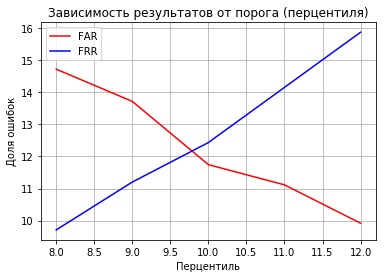

In [39]:
plt.title('Зависимость результатов от порога (перцентиля)')
plt.ylabel('Доля ошибок')
plt.xlabel('Перцентиль')
plt.plot(x[3:8], plot_out[-len(x) + 3:-len(x) + 8], color='red', label='FAR')
plt.plot(x[3:8], plot_test[-len(x) + 3:-len(x) + 8], color='b', label='FRR')
plt.legend()
plt.grid()
plt.show()

# LOF

-----------------
cityblock
-----
2
--------------------
neib = 2
OUT-mean 0.0512605042017
OUT-std 0.0539680822806
TEST-mean 0.280519480519
TEST-std 0.162254524166
-----
3
--------------------
neib = 3
OUT-mean 0.0777209065444
OUT-std 0.0851185695743
TEST-mean 0.18538961039
TEST-std 0.121551347751
-----
4
--------------------
neib = 4
OUT-mean 0.0956251591546
OUT-std 0.109510933003
TEST-mean 0.156818181818
TEST-std 0.124105417543
-----
5
--------------------
neib = 5
OUT-mean 0.107984466514
OUT-std 0.119922660182
TEST-mean 0.149025974026
TEST-std 0.114550589601
-----
6
--------------------
neib = 6
OUT-mean 0.111769798829
OUT-std 0.120724471708
TEST-mean 0.14025974026
TEST-std 0.110473612042
-----
7
--------------------
neib = 7
OUT-mean 0.119828113063
OUT-std 0.131785095228
TEST-mean 0.13538961039
TEST-std 0.110804700865
-----
8
--------------------
neib = 8
OUT-mean 0.117167048638
OUT-std 0.123846387129
TEST-mean 0.133116883117
TEST-std 0.119725539282
-----
9
--------------------
nei

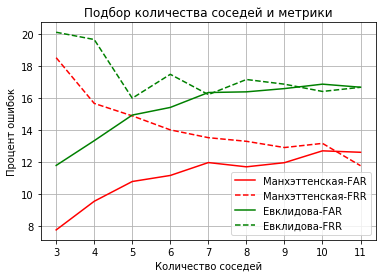

In [41]:
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA, TruncatedSVD

good_train_size = 40
num_users = 56
num_shuf = 5
plot_out = []
plot_test = []
x = range(2,12,1)
X = data.drop('Subject', axis=1, inplace=False)
X = X.values
for metr in ['cityblock', 'euclidean']:
    print('-----------------')
    print(metr)
    for neib in x:
        print("-----")
        print(neib)
        print("--------------------")
        print('neib =', neib)
        #thres_array = []
        for thres in [3]:
            errors_out = []
            errors_test = []
            #print("------")
            #print(thres)
            for user in range(num_users):
                for shuf in range(num_shuf):
                    X_good = X[user * 51:(user + 1) * 51]
                    scaler = StandardScaler()
                    np.random.shuffle(X_good)

                    X_train = scaler.fit_transform(X_good[:good_train_size])
                    X_test = scaler.transform(X_good[good_train_size:])
                    X_out = scaler.transform(np.concatenate((X[:user * 51], X[(user + 1) * 51:]), axis=0))

                    np.random.shuffle(X_out)

                    clf = LocalOutlierFactor(n_neighbors=neib, metric=metr)
                    clf.fit(X_train)
                    y_pred_test = clf._decision_function(X_test)
                    y_pred_out = clf._decision_function(X_out)

                    threshold = np.percentile(clf._decision_function(X_train), thres)
                    #thres_array.append(threshold)

                    err_test = y_pred_test[y_pred_test < threshold].size
                    errors_test.append(err_test)

                    err_out = y_pred_out[y_pred_out >= threshold].size
                    errors_out.append(err_out)

            print("OUT-mean", np.mean(errors_out) / X_out.shape[0])
            plot_out.append(np.mean(errors_out) / X_out.shape[0] * 100)
            print("OUT-std", np.std(errors_out) / X_out.shape[0])

            print("TEST-mean", np.mean(errors_test) / X_test.shape[0])
            plot_test.append(np.mean(errors_test) / X_test.shape[0] * 100)
            print("TEST-std", np.std(errors_test) / X_test.shape[0])

            #print("threshold", np.mean(thres_array))

plt.title('Подбор количества соседей и метрики')
plt.plot(x[1:], plot_out[1:len(x)], color='r', label='Манхэттенская-FAR')
plt.plot(x[1:], plot_test[1:len(x)], 'r--', label='Манхэттенская-FRR')
plt.plot(x[1:], plot_out[len(x) + 1:2 * len(x)], color='g', label='Евклидова-FAR')
plt.plot(x[1:], plot_test[len(x) + 1:2 * len(x)], 'g--', label='Евклидова-FRR')

plt.legend()
plt.xlabel('Количество соседей')
plt.ylabel('Процент ошибок')
plt.grid()
plt.show()

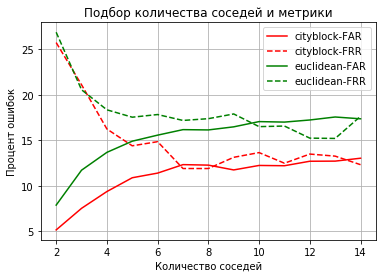

In [27]:
plt.title('Подбор количества соседей и метрики')
plt.plot(x[1:], plot_out[1:len(x)], color='r', label='Манхэттенская-FAR')
plt.plot(x[1:], plot_test[1:len(x)], 'r--', label='Манхэттенская-FRR')
plt.plot(x[1:], plot_out[len(x) + 1:2 * len(x)], color='g', label='Евклидова-FAR')
plt.plot(x[1:], plot_test[len(x) + 1:2 * len(x)], 'g--', label='Евклидова-FRR')

plt.legend()
plt.xlabel('Количество соседей')
plt.ylabel('Процент ошибок')
plt.grid()
plt.show()

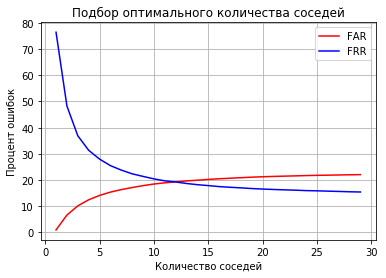

In [28]:
plt.title('Подбор оптимального количества соседей')
plt.plot(x, plot_out, color='red', label='FAR')
plt.plot(x, plot_test, color='blue', label='FRR')
plt.legend()
plt.xlabel('Количество соседей')
plt.ylabel('Процент ошибок')
plt.grid()
plt.show()

# One-class SVM

------
0.006
------
1
OUT-mean 0.16614616755793227
OUT-std 0.11755737866427123
TEST-mean 0.16
TEST-std 0.1129030887000729
------
0.007
------
1
OUT-mean 0.15168627450980393
OUT-std 0.11332229758781952
TEST-mean 0.14909090909090908
TEST-std 0.10246547493531179
------
0.008
------
1
OUT-mean 0.14909090909090908
OUT-std 0.10228903943327104
TEST-mean 0.14909090909090908
TEST-std 0.08481384574320437
------
0.009000000000000001
------
1
OUT-mean 0.1300534759358289
OUT-std 0.09743518347915638
TEST-mean 0.13454545454545455
TEST-std 0.09998346970812742
------
0.01
------
1
OUT-mean 0.12279500891265598
OUT-std 0.09512805444260387
TEST-mean 0.21454545454545454
TEST-std 0.14966629547095767
------
0.011
------
1
OUT-mean 0.11094474153297683
OUT-std 0.08114414060477776
TEST-mean 0.24727272727272728
TEST-std 0.11928159612259435
------
0.012
------
1
OUT-mean 0.09286274509803923
OUT-std 0.07088033479486476
TEST-mean 0.22545454545454546
TEST-std 0.15665933984391286


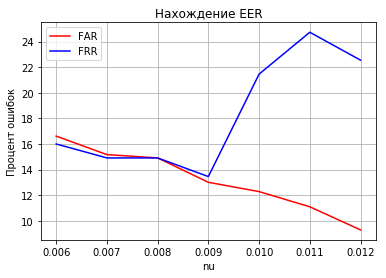

In [60]:
from sklearn.svm import OneClassSVM
from sklearn.preprocessing import StandardScaler

good_train_size = 40
num_users = 5
num_shuf = 5
plot_out = []
plot_test = []

X = data.drop('Subject', axis=1, inplace=False)
X = X.values

x = np.arange(0.006, 0.013, 0.001)
#x = range(1, 10)
for metr in ['cityblock']:
    for gam in x:
        print('------')
        print(gam)
        #thres_array = []
        for thres in [1]:
            errors_out = []
            errors_test = []
            print("------")
            print(thres)
            for user in range(num_users):
                for shuf in range(num_shuf):
                    X_good = X[user * 51:(user + 1) * 51]
                    scaler = StandardScaler()
                    np.random.shuffle(X_good)

                    X_train = scaler.fit_transform(X_good[:good_train_size])
                    X_test = scaler.transform(X_good[good_train_size:])
                    X_out = scaler.transform(np.concatenate((X[:user * 51], X[(user + 1) * 51:]), axis=0))

                    np.random.shuffle(X_out)

                    clf = OneClassSVM(kernel='rbf', nu=0.5, gamma=gam)#, gamma=gam)
                    clf.fit(X_train)
                    
                    y_pred_test = clf._decision_function(X_test)
                    y_pred_out = clf._decision_function(X_out)
                    
                    #print(np.mean(y_pred_test))
                    #print(np.mean(y_pred_out))


                    threshold = np.percentile(clf._decision_function(X_train), thres)
                    #thres_array.append(threshold)

                    err_test = y_pred_test[y_pred_test < threshold].size
                    errors_test.append(err_test)

                    err_out = y_pred_out[y_pred_out >= threshold].size
                    errors_out.append(err_out)
                    '''
                    y_pred_train = clf.predict(X_train)
                    y_pred_test = clf.predict(X_test)
                    y_pred_out = clf.predict(X_out)
                    err_test = y_pred_test[y_pred_test == -1].size
                    err_out = y_pred_out[y_pred_out == 1].size
                    errors_out.append(err_out)
                    errors_test.append(err_test)
                    '''

            print("OUT-mean", np.mean(errors_out) / X_out.shape[0])
            plot_out.append(np.mean(errors_out) / X_out.shape[0] * 100)
            print("OUT-std", np.std(errors_out) / X_out.shape[0])

            print("TEST-mean", np.mean(errors_test) / X_test.shape[0])
            plot_test.append(np.mean(errors_test) / X_test.shape[0] * 100)
            print("TEST-std", np.std(errors_test) / X_test.shape[0])

            #print("threshold", np.mean(thres_array))

plt.title('Нахождение EER')
plt.plot(x, plot_out, color='r', label='FAR')
plt.plot(x, plot_test, 'b', label='FRR')

plt.legend()
plt.xlabel('nu')
plt.ylabel('Процент ошибок')
plt.grid()
plt.show()

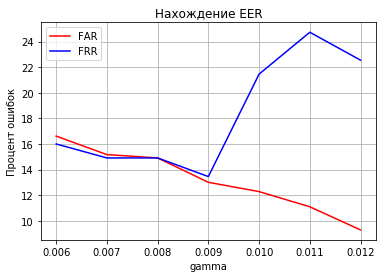

In [61]:
plt.title('Нахождение EER')
plt.plot(x, plot_out, color='r', label='FAR')
plt.plot(x, plot_test, 'b', label='FRR')

plt.legend()
plt.xlabel('gamma')
plt.ylabel('Процент ошибок')
plt.grid()
plt.show()

No handles with labels found to put in legend.


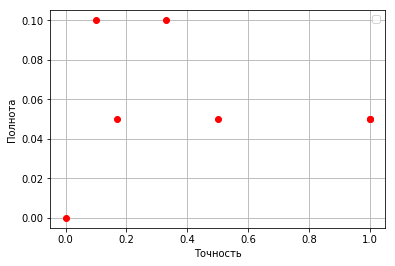

In [62]:
x1 = [0.1,0,0.5,0.33,0.17,1,1]
y1 = [0.1,0,0.05,0.1,0.05,0.05,0.05]

#n = [i for i in range(1, 8)]

#plt.title('Нахождение EER')
plt.plot(x1, y1, 'ro')

plt.xlabel('Точность')
plt.ylabel('Полнота')
plt.legend()
plt.grid()
plt.show()

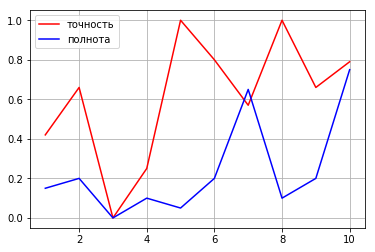

In [11]:
x2 = [0.42,0.66,0,0.25,1,0.8,0.57,1,0.66,0.79]
y2 = [0.15,0.2,0,0.1,0.05,0.2,0.65,0.1,0.2,0.75]

n = [i for i in range(1, 11)]

#plt.title('Нахождение EER')
plt.plot(x1, y1, 'ro')

plt.xlabel('Точность')
plt.ylabel('Полнота')
plt.legend()
plt.grid()
plt.show()